Import essential libraries for data manipulation and visualization: pandas, numpy, matplotlib, and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the processed and original diabetes datasets. The processed data is used for most plots, while the original is used for comparison.

In [25]:
df = pd.read_csv("processed_diabetes_data.csv")
original_df = pd.read_csv("diabetes_data.csv")

C:\Users\Aavash\AppData\Local\Temp\ipykernel_3668\1143723305.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("diabetes_data.csv")


Plot the distribution of readmission outcomes ('<30', '>30', 'NO') in the original dataset. This shows the class balance and prevalence of early readmissions.

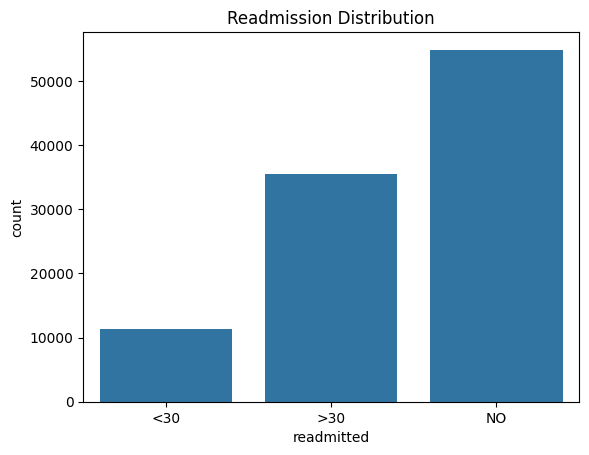

In [26]:
sns.countplot(data=original_df, x='readmitted', order=['<30', '>30', 'NO'])
plt.title('Readmission Distribution')
plt.show()

Visualize the relationship between demographic features (gender, race, age group) and readmission status. These plots help identify if certain groups are more likely to be readmitted.
- Gender vs Readmission: Compares readmission rates between males and females.
- Race vs Readmission: Shows readmission rates across different racial groups.
- Age Group vs Readmission: Examines how readmission counts vary by age group.

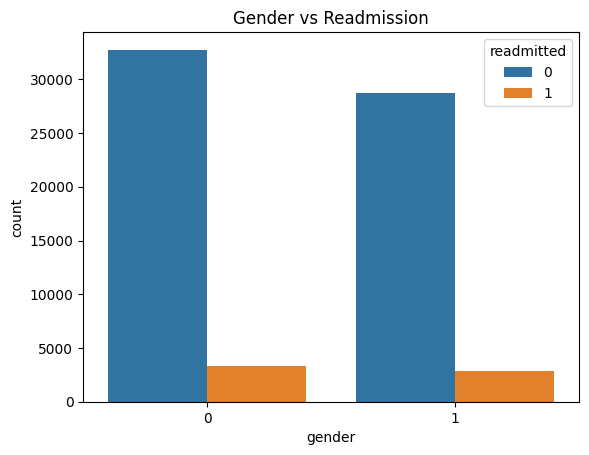

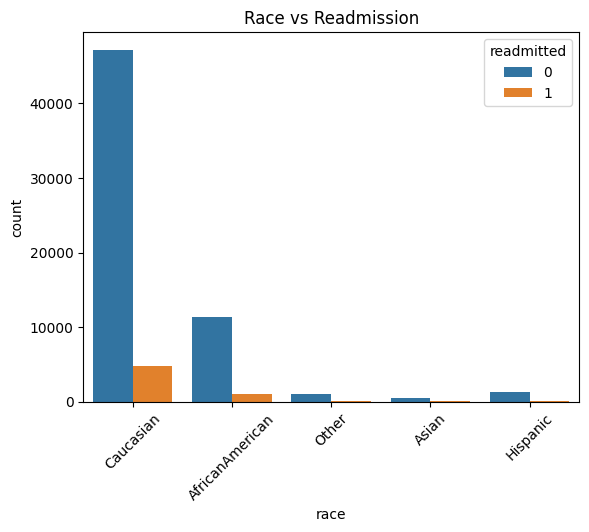

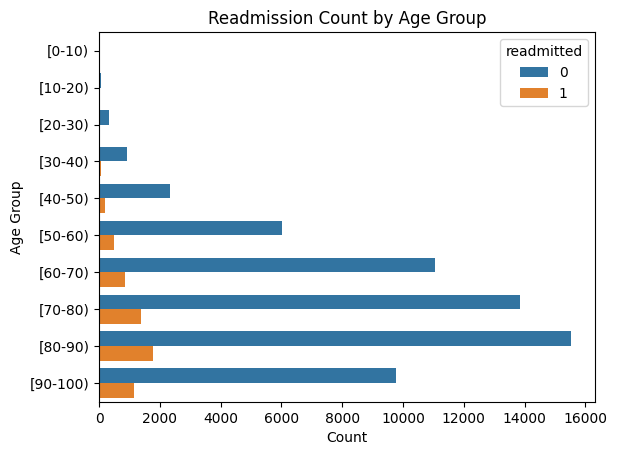

In [30]:
# Demographics
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title('Gender vs Readmission')
plt.show()

sns.countplot(data=df, x='race', hue='readmitted')
plt.title('Race vs Readmission')
plt.xticks(rotation=45)
plt.show()

age_remap = {i: f'[{10*i}-{10*(i+1)})' for i in range(10)}
df['age_group'] = df['age'].map(age_remap)
sns.countplot(data=df, y='age_group', hue='readmitted', order=[f'[{10*i}-{10*(i+1)})' for i in range(10)])
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Readmission Count by Age Group')
plt.show()

Show how readmission rates vary by primary diagnosis category and HbA1c status. This bar plot helps identify which diagnoses and glycemic control statuses are associated with higher readmission risk.

C:\Users\Aavash\AppData\Local\Temp\ipykernel_3668\3888341669.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diag_1_name', y='readmitted', hue='hba1c_attention', data=df, ci=None)


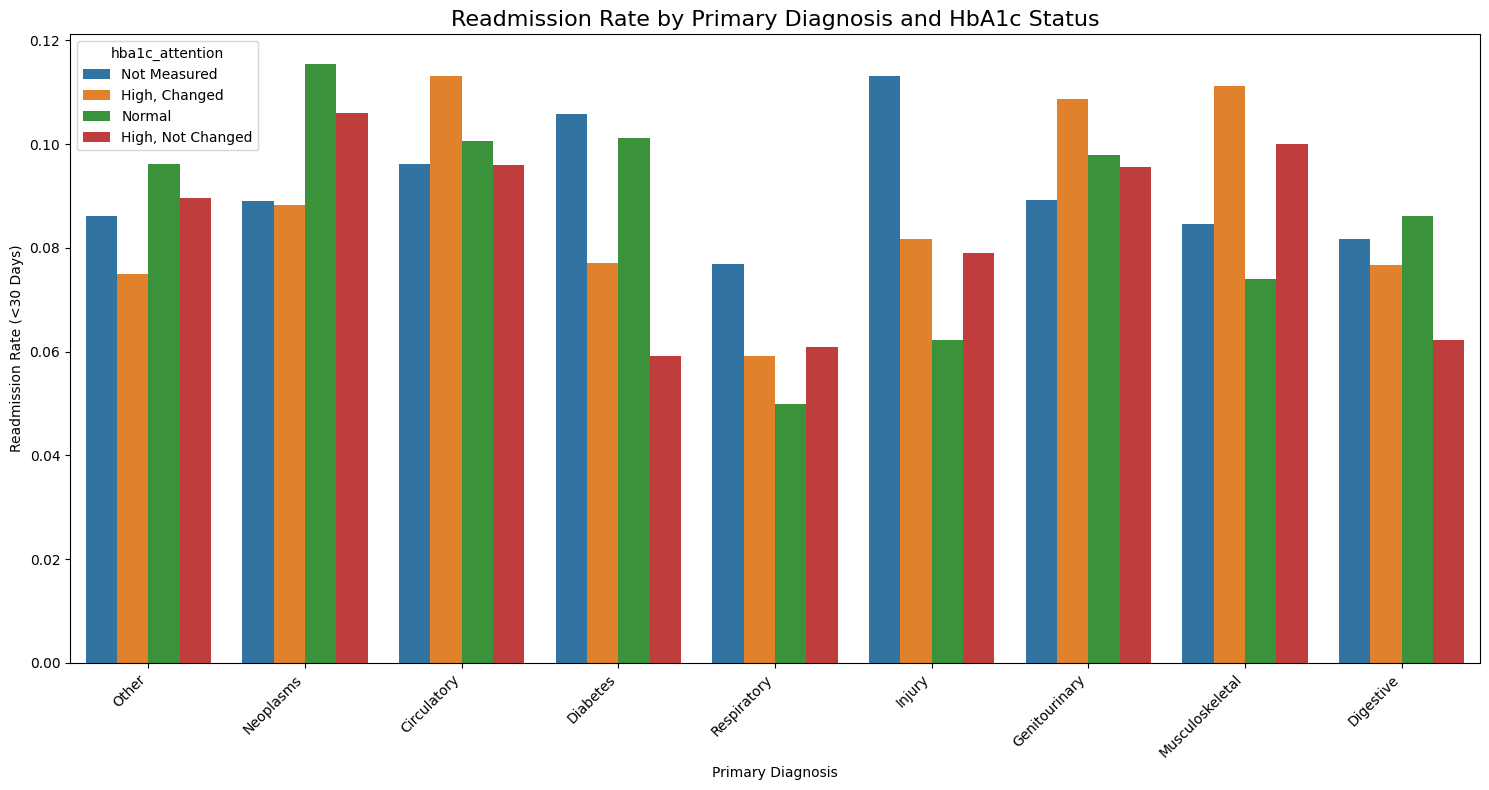

In [31]:
diag_map = {1: 'Circulatory', 2: 'Respiratory', 3: 'Digestive', 4: 'Diabetes', 5: 'Injury', 6: 'Musculoskeletal', 7: 'Genitourinary', 8: 'Neoplasms', 9: 'Other'}
df['diag_1_name'] = df['diag_1'].map(diag_map)

plt.figure(figsize=(15, 8))
sns.barplot(x='diag_1_name', y='readmitted', hue='hba1c_attention', data=df, ci=None)
plt.title('Readmission Rate by Primary Diagnosis and HbA1c Status', fontsize=16)
plt.ylabel('Readmission Rate (<30 Days)')
plt.xlabel('Primary Diagnosis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Boxplot comparing comorbidity scores between readmitted and non-readmitted patients. This visualizes whether patients with more comorbidities are more likely to be readmitted.

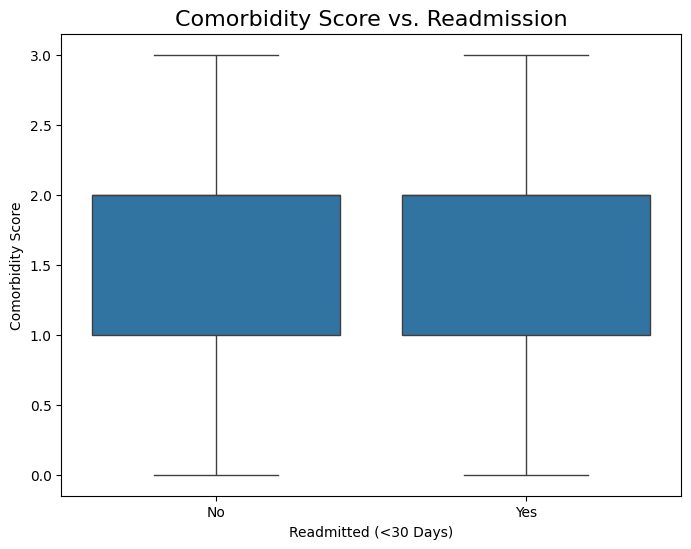

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='comorbidity_score', data=df)
plt.title('Comorbidity Score vs. Readmission', fontsize=16)
plt.xlabel('Readmitted (<30 Days)')
plt.ylabel('Comorbidity Score')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Kernel density plot of the log-transformed prior year healthcare utilization, split by readmission status. This shows if higher prior utilization is associated with increased readmission risk.

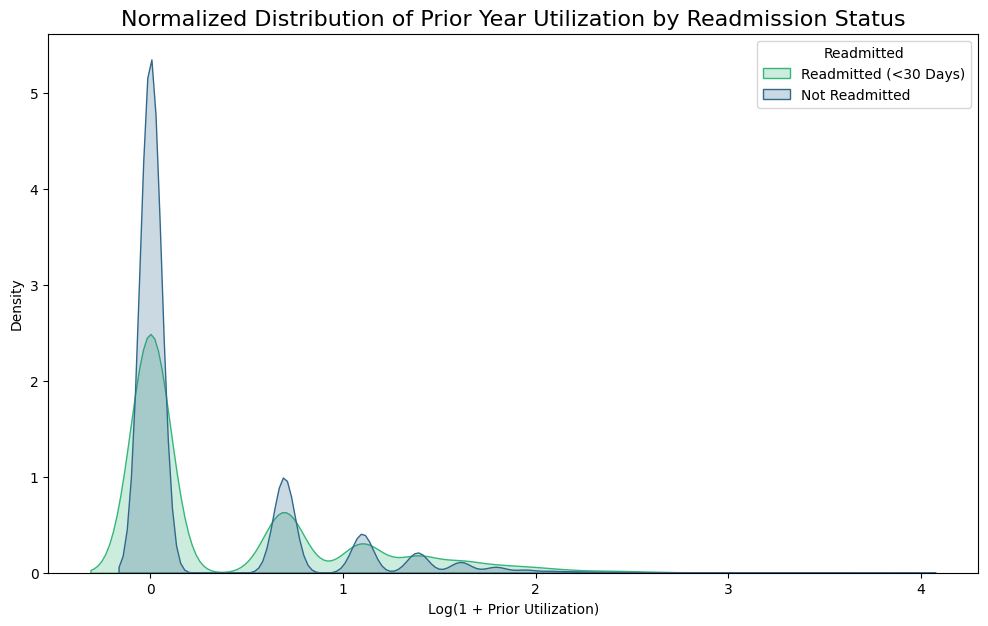

In [ ]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x=np.log1p(df['prior_utilization']), hue='readmitted', fill=True, common_norm=False, palette="viridis")
plt.title('Normalized Distribution of Prior Year Utilization by Readmission Status', fontsize=16)
plt.xlabel('Log(1 + Prior Utilization)')
plt.ylabel('Density')
leg = plt.legend(title='Readmitted', labels=['Readmitted (<30 Days)', 'Not Readmitted'])
# plt.savefig("prior_utilization_density_plot.png")
plt.show()

Violin plot of the number of lab procedures by readmission status. This visualizes the distribution and spread, highlighting if more lab work is associated with readmission.

C:\Users\Aavash\AppData\Local\Temp\ipykernel_3668\291947825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y='num_lab_procedures', data=df, palette="plasma")


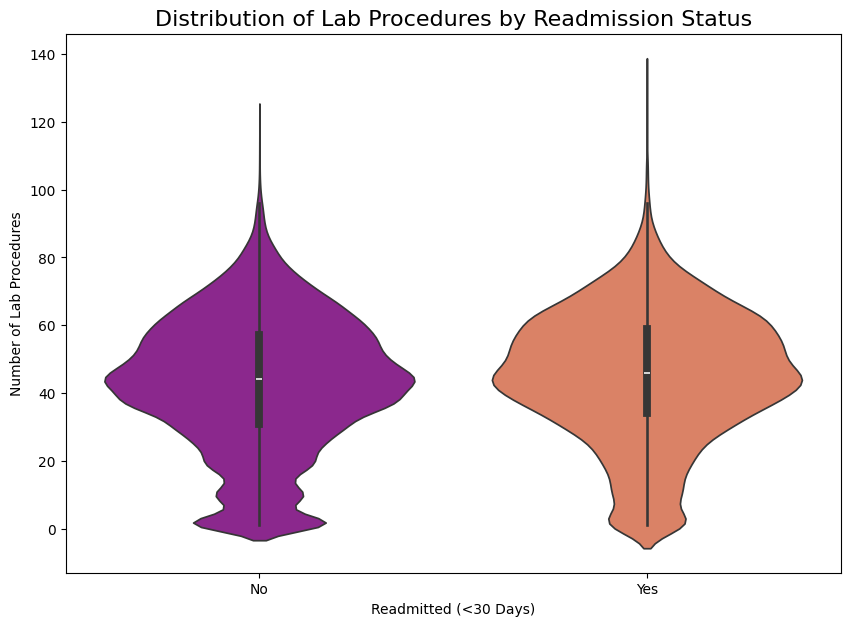

In [ ]:
# 1. Number of Lab Procedures vs. Readmission
plt.figure(figsize=(10, 7))
sns.violinplot(x='readmitted', y='num_lab_procedures', data=df, palette="plasma")
plt.title('Distribution of Lab Procedures by Readmission Status', fontsize=16)
plt.xlabel('Readmitted (<30 Days)')
plt.ylabel('Number of Lab Procedures')
plt.xticks([0, 1], ['No', 'Yes'])
# plt.savefig("lab_procedures_vs_readmission.png")
plt.show()

Point plot of readmission rate by age group. This shows how the likelihood of readmission changes across different age brackets.

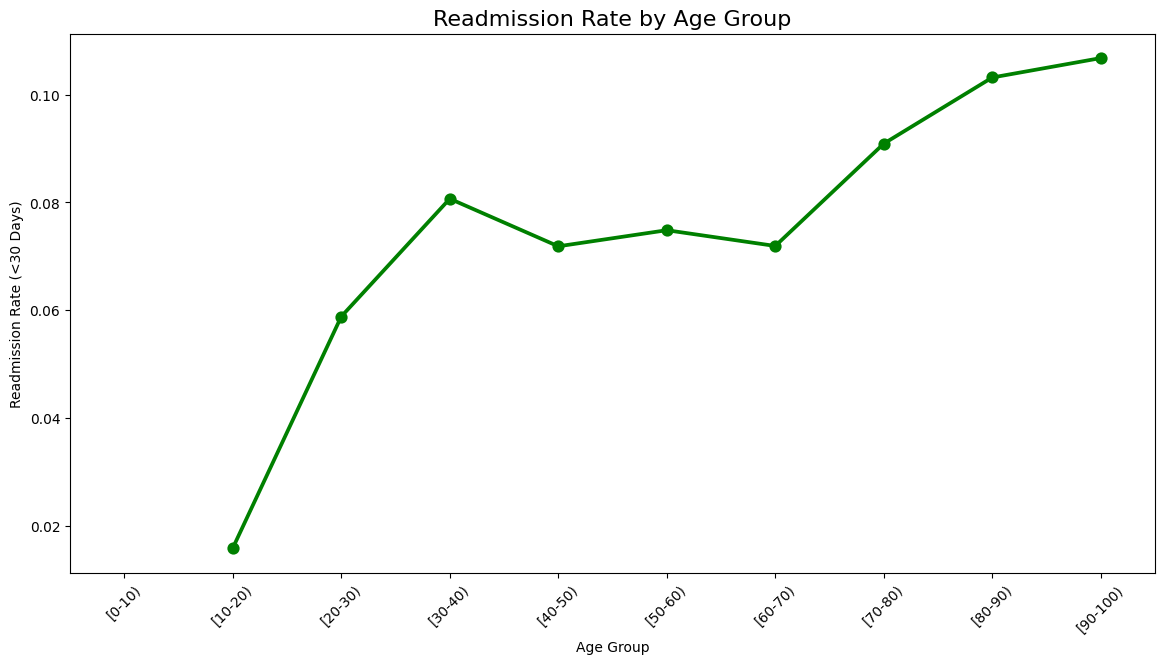

In [ ]:
# age_remap = {i: f'[{10*i}-{10*(i+1)})' for i in range(10)}
# df['age_group'] = df['age'].map(age_remap)
plt.figure(figsize=(14, 7))
sns.pointplot(data=df, x='age_group', order=[f'[{10*i}-{10*(i+1)})' for i in range(10)], y='readmitted', errorbar=None, color='green')
plt.title('Readmission Rate by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (<30 Days)')
plt.xticks(rotation=45)
# plt.savefig("age_vs_readmission_rate.png")
plt.show()

Bar plot of readmission rate by medication change status. This shows whether patients whose diabetic medications were changed during their stay are more likely to be readmitted.

C:\Users\Aavash\AppData\Local\Temp\ipykernel_3668\1518670915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='change', y='readmitted', errorbar=None, palette='coolwarm')


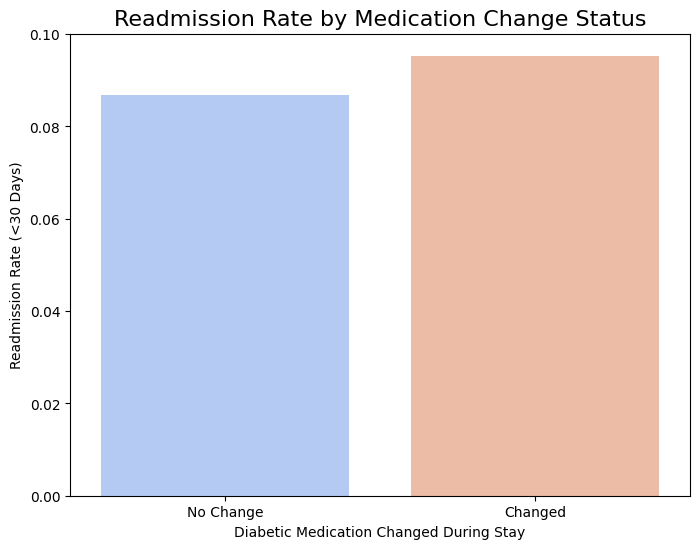

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='change', y='readmitted', errorbar=None, palette='coolwarm')
plt.title('Readmission Rate by Medication Change Status', fontsize=16)
plt.xlabel('Diabetic Medication Changed During Stay')
plt.ylabel('Readmission Rate (<30 Days)')
plt.xticks([0, 1], ['No Change', 'Changed'])
# plt.savefig("medication_change_vs_readmission.png")
plt.show()

Point plot of the mean number of diagnoses for readmitted vs. non-readmitted patients. This helps assess if patients with more diagnoses are at higher risk of readmission.

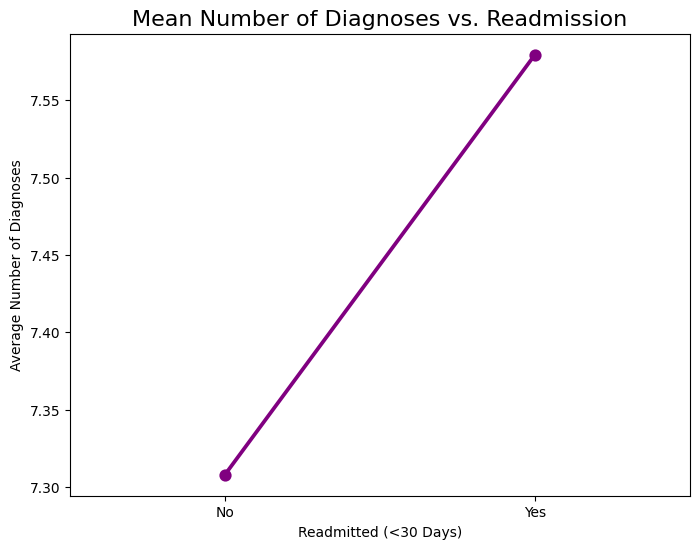

In [ ]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='readmitted', y='number_diagnoses', data=df, errorbar=None, color='purple')
plt.title('Mean Number of Diagnoses vs. Readmission', fontsize=16)
plt.xlabel('Readmitted (<30 Days)')
plt.ylabel('Average Number of Diagnoses')
plt.xticks([0, 1], ['No', 'Yes'])
# plt.savefig("diagnoses_vs_readmission.png")
plt.show()

Bar plot of readmission rate by admission source. This shows which sources (e.g., ER, physician referral) are associated with higher readmission rates.

C:\Users\Aavash\AppData\Local\Temp\ipykernel_3668\1651481439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='admission_source_name', y='readmitted', order=['Emergency Room', 'Physician Referral', 'Clinic Referral', 'Transfer from Hosp.', 'Other/Unknown'], errorbar=None, palette='magma')


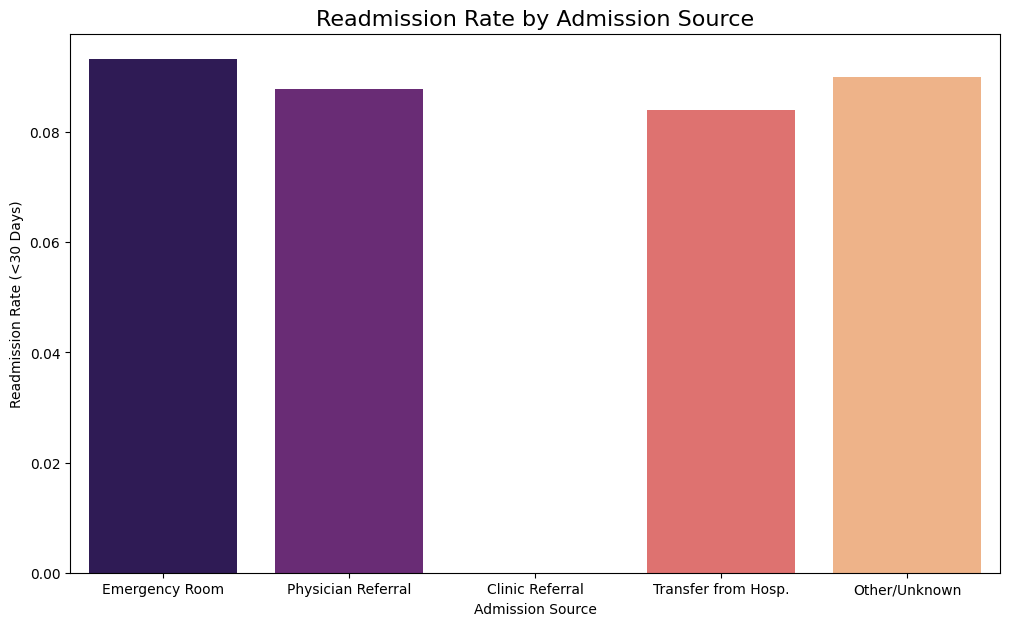

In [ ]:
admission_source_map = {1: 'Physician Referral', 2: 'Clinic Referral', 4: 'Transfer from Hosp.', 7: 'Emergency Room'}
df['admission_source_name'] = df['admission_source_id'].map(admission_source_map).fillna('Other/Unknown')
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='admission_source_name', y='readmitted', order=['Emergency Room', 'Physician Referral', 'Clinic Referral', 'Transfer from Hosp.', 'Other/Unknown'], errorbar=None, palette='magma')
plt.title('Readmission Rate by Admission Source', fontsize=16)
plt.xlabel('Admission Source')
plt.ylabel('Readmission Rate (<30 Days)')
# plt.savefig("admission_source_vs_readmission.png")
plt.show()

Boxplot of time in hospital by readmission status. This visualizes whether longer or shorter hospital stays are associated with readmission.

<Axes: xlabel='readmitted', ylabel='time_in_hospital'>

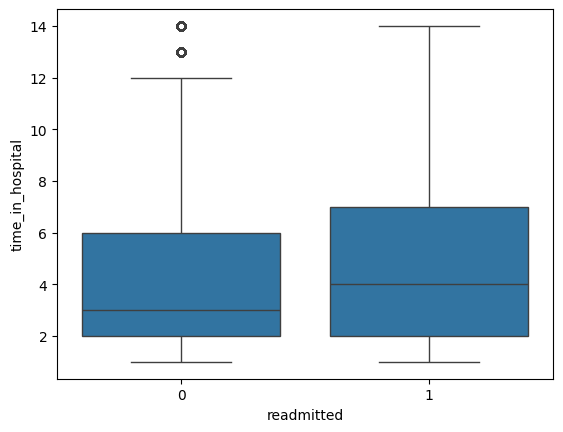

In [21]:
sns.boxplot(data=df, x='readmitted', y='time_in_hospital')

Count plots of categorical admission and discharge features vs. readmission. These plots help identify if certain admission or discharge types are linked to higher readmission rates.

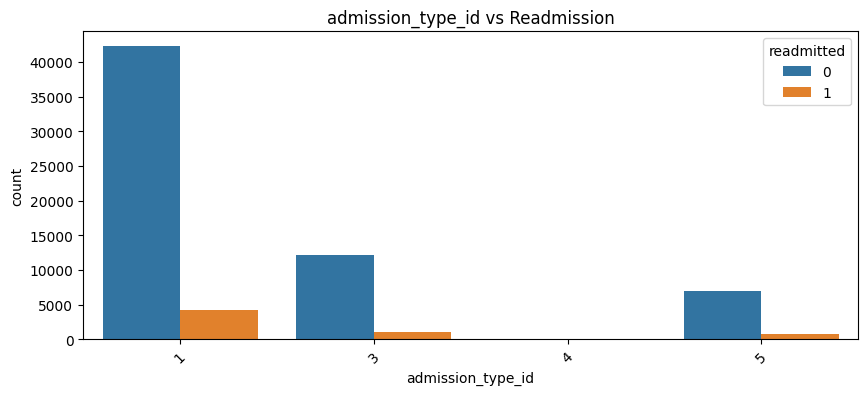

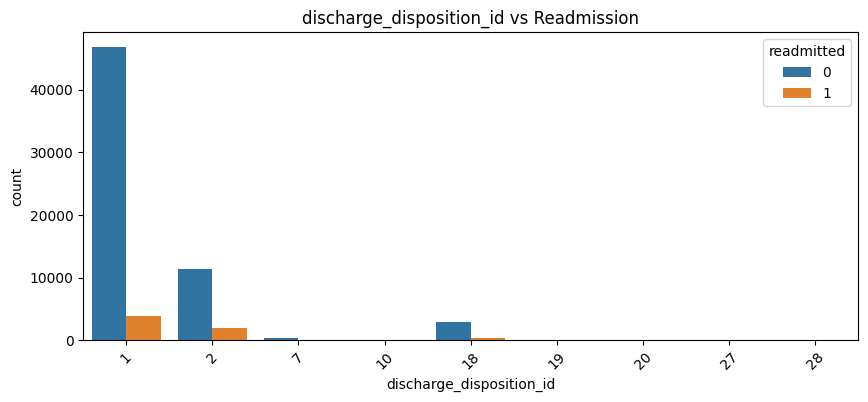

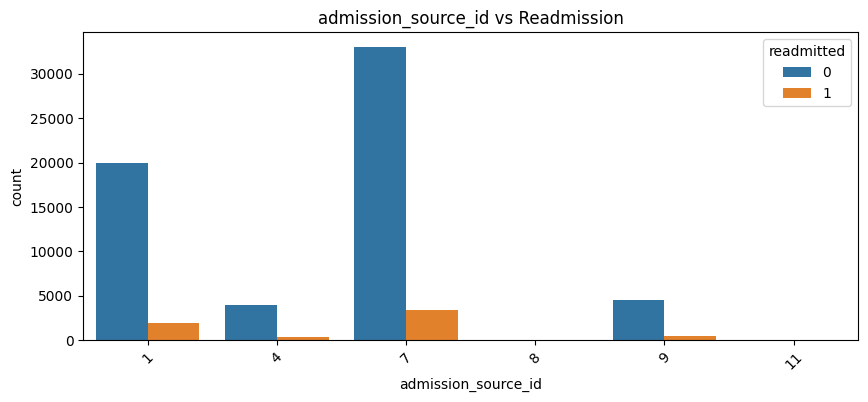

In [34]:
for col in ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)
    plt.show()

Violin plots of various visit and procedure counts by readmission status. These show the distribution of healthcare utilization features for readmitted vs. non-readmitted patients.

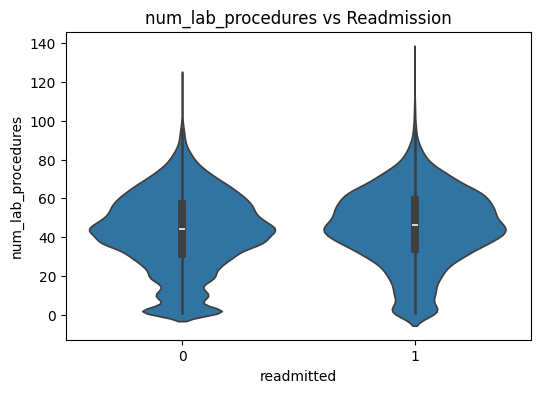

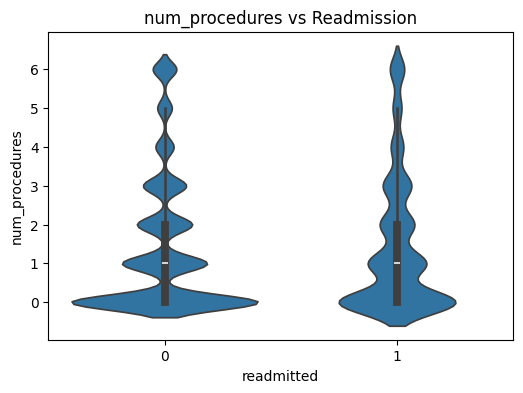

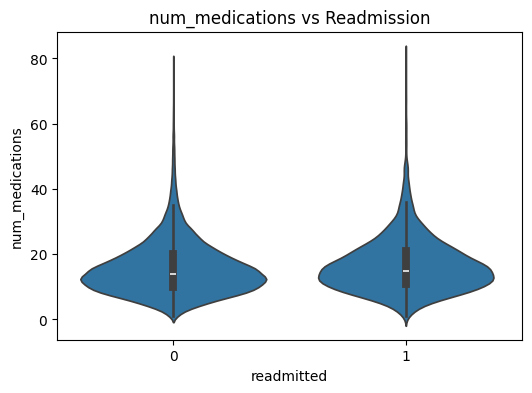

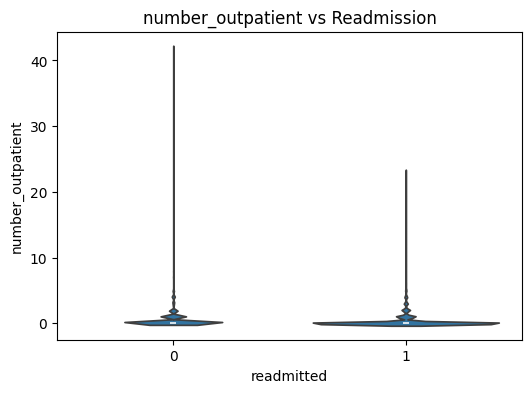

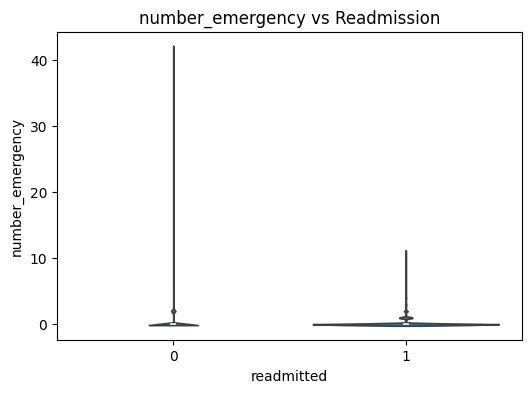

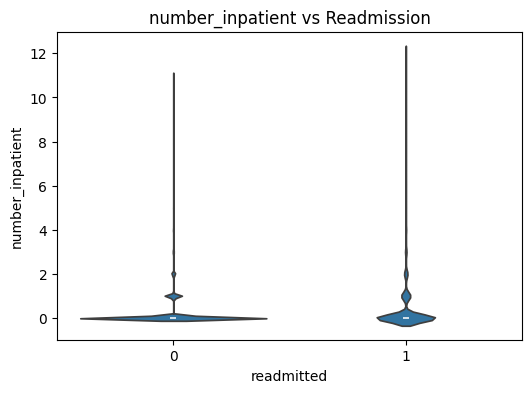

In [36]:
visit_cols = ['num_lab_procedures', 'num_procedures', 'num_medications',
              'number_outpatient', 'number_emergency', 'number_inpatient']

for col in visit_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='readmitted', y=col)
    plt.title(f'{col} vs Readmission')
    plt.show()

Count plots of max glucose serum and A1C result by readmission status. These plots show if abnormal lab results are associated with higher readmission risk.

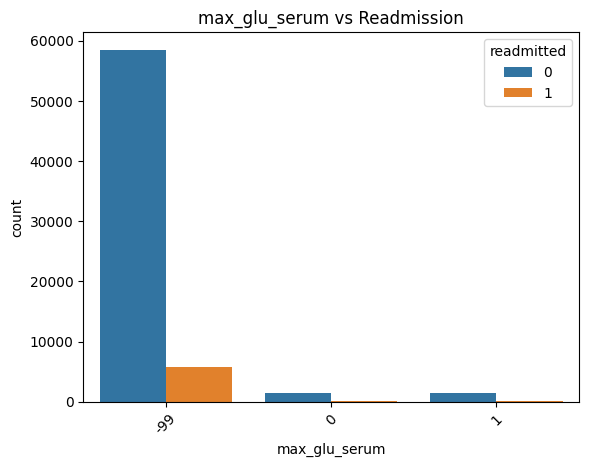

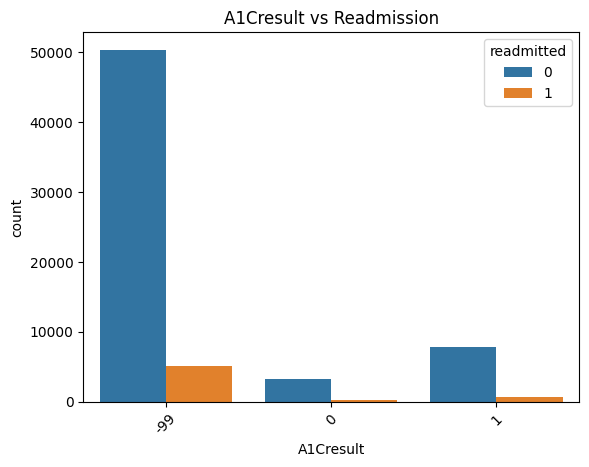

In [37]:
for col in ['max_glu_serum', 'A1Cresult']:
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)
    plt.show()

Count plots of medication change and diabetes medication status by readmission. These plots show if changes in medication or being on diabetes medication are linked to readmission.

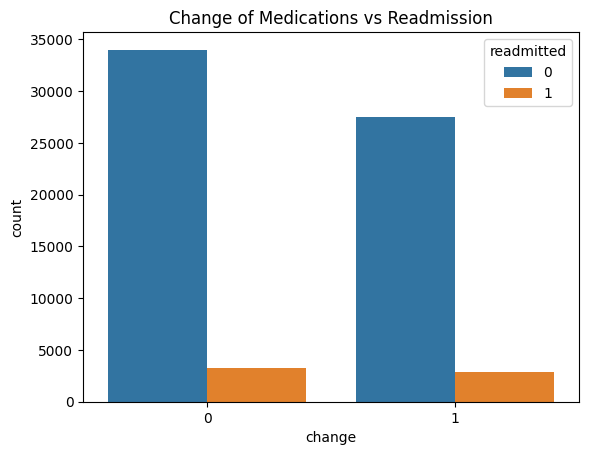

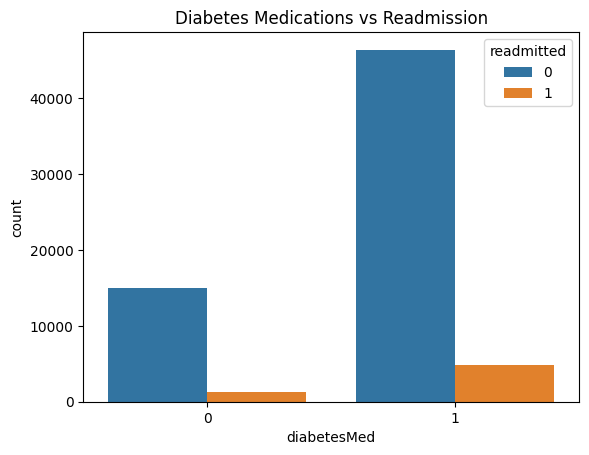

In [38]:
sns.countplot(data=df, x='change', hue='readmitted')
plt.title('Change of Medications vs Readmission')
plt.show()

sns.countplot(data=df, x='diabetesMed', hue='readmitted')
plt.title('Diabetes Medications vs Readmission')
plt.show()

Heatmap of correlations between key numeric features (e.g., time in hospital, number of procedures). This helps identify relationships between features that may influence readmission.

<Axes: >

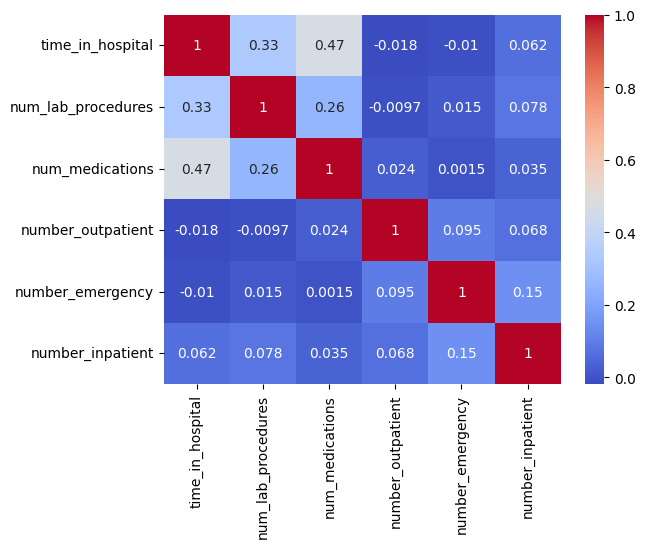

In [39]:
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient']

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')